In [5]:
import pandas as pd
weather = pd.read_csv("local_weather.csv", index_col="datetime")
weather

,condition,_dewptm,fog,humidity,pressure,rain,snow,temp,thunder,_vism,_wdird,_wdire
datetime,,,,,,,,,,,,
19961101-11:00,Smoke,9.0,0,27.0,1010.0,0,0,30.0,0,5.0,280.0,West
19961101-12:00,Smoke,10.0,0,32.0,-9999.0,0,0,28.0,0,NaN,0.0,North
19961101-13:00,Smoke,11.0,0,44.0,-9999.0,0,0,24.0,0,NaN,0.0,North
19961101-14:00,Smoke,10.0,0,41.0,1010.0,0,0,24.0,0,2.0,0.0,North
19961101-16:00,Smoke,11.0,0,47.0,1011.0,0,0,23.0,0,1.2,0.0,North
...,...,...,...,...,...,...,...,...,...,...,...,...
20170424-06:00,Haze,17.0,0,25.0,1005.0,0,0,34.0,0,4.0,320.0,NW
20170424-09:00,Haze,14.0,0,16.0,1003.0,0,0,38.0,0,4.0,320.0,NW
20170424-12:00,Haze,12.0,0,14.0,1002.0,0,0,36.0,0,4.0,270.0,West


In [6]:
weather.apply(pd.isnull).sum()/weather.shape[0]

condition    0.000713
 _dewptm     0.006149
fog          0.000000
humidity     0.007496
pressure     0.002297
rain         0.000000
snow         0.000000
temp         0.006664
thunder      0.000000
 _vism       0.043846
 _wdird      0.146104
 _wdire      0.146104
dtype: float64

In [10]:
core_weather = weather[["condition", "fog", "humidity", "pressure", "rain","temp","thunder","_wdire"]].copy()
core_weather.columns = ["condition", "fog", "humidity", "pressure", "rain","temp","thunder","winddir"]

In [11]:
core_weather

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
19961101-11:00,Smoke,0,27.0,1010.0,0,30.0,0
19961101-12:00,Smoke,0,32.0,-9999.0,0,28.0,0
19961101-13:00,Smoke,0,44.0,-9999.0,0,24.0,0
19961101-14:00,Smoke,0,41.0,1010.0,0,24.0,0
19961101-16:00,Smoke,0,47.0,1011.0,0,23.0,0
...,...,...,...,...,...,...,...
20170424-06:00,Haze,0,25.0,1005.0,0,34.0,0
20170424-09:00,Haze,0,16.0,1003.0,0,38.0,0
20170424-12:00,Haze,0,14.0,1002.0,0,36.0,0


In [12]:
core_weather.apply(pd.isnull).sum()

condition     72
fog            0
humidity     757
pressure     232
rain           0
temp         673
thunder        0
dtype: int64

In [13]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

condition    0.000713
fog          0.000000
humidity     0.007496
pressure     0.002297
rain         0.000000
temp         0.006664
thunder      0.000000
dtype: float64

In [14]:
core_weather["condition"].value_counts()

condition
Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain     

In [15]:
core_weather["fog"].value_counts()


fog
0    93952
1     7038
Name: count, dtype: int64

In [16]:
core_weather["humidity"].value_counts()

humidity
100.0    3044
94.0     2852
89.0     2207
82.0     2003
79.0     1968
         ... 
4.0        42
5.0        36
225.0       1
135.0       1
243.0       1
Name: count, Length: 100, dtype: int64

In [17]:
core_weather["rain"].value_counts()

rain
0    98338
1     2652
Name: count, dtype: int64

In [18]:
core_weather[pd.isnull(core_weather["condition"])]

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
20040719-03:00,NaN,0,49.0,997.0,0,31.0,0
20050103-09:00,NaN,0,NaN,1017.0,0,NaN,0
20050312-15:00,NaN,0,NaN,1014.0,0,NaN,0
20050408-12:00,NaN,0,6.0,1004.0,0,33.0,0
20050427-06:00,NaN,0,16.0,1005.0,0,35.0,0
...,...,...,...,...,...,...,...
20160817-09:00,NaN,0,59.0,NaN,0,31.0,0
20161213-21:00,NaN,0,89.0,1016.0,0,13.0,0
20161231-15:00,NaN,0,NaN,1016.0,0,NaN,0


In [22]:
core_weather.loc["20040719-03:00":"20040730-03:00",:]

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
20040719-03:00,NaN,0,49.0,997.0,0,31.0,0
20040719-06:00,Haze,0,36.0,996.0,0,36.0,0
20040719-09:00,Haze,0,27.0,994.0,0,38.0,0
20040719-12:00,Haze,0,21.0,993.0,0,35.0,0
20040719-15:00,Haze,0,41.0,995.0,0,33.0,0
...,...,...,...,...,...,...,...
20040729-15:00,Haze,0,63.0,1000.0,0,31.0,0
20040729-18:00,Haze,0,72.0,1002.0,0,29.0,0
20040729-21:00,Haze,0,78.0,1002.0,0,29.0,0


In [24]:
core_weather["condition"] = core_weather["condition"].fillna(method="ffill")

In [25]:
core_weather[pd.isnull(core_weather["condition"])]

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,


In [26]:
core_weather.apply(pd.isnull).sum()

condition      0
fog            0
humidity     757
pressure     232
rain           0
temp         673
thunder        0
dtype: int64

In [28]:
core_weather.loc["20040719-03:00":"20040721-03:00",:]

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
20040719-03:00,Haze,0,49.0,997.0,0,31.0,0
20040719-06:00,Haze,0,36.0,996.0,0,36.0,0
20040719-09:00,Haze,0,27.0,994.0,0,38.0,0
20040719-12:00,Haze,0,21.0,993.0,0,35.0,0
20040719-15:00,Haze,0,41.0,995.0,0,33.0,0
20040719-18:00,Haze,0,50.0,996.0,0,31.0,0
20040719-21:00,Haze,0,53.0,996.0,0,31.0,0
20040720-00:00,Haze,0,61.0,996.0,0,29.0,0
20040720-03:00,Haze,0,39.0,997.0,0,33.0,0


In [30]:
core_weather[pd.isnull(core_weather["humidity"])]

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
19961108-01:00,Smoke,0,NaN,1014.0,0,NaN,0
19961113-02:00,Smoke,0,NaN,1012.0,0,NaN,0
19961116-06:00,Unknown,0,NaN,-9999.0,0,NaN,0
19961126-04:00,Smoke,0,NaN,1017.0,0,NaN,0
19961129-18:00,Smoke,0,NaN,-9999.0,0,NaN,0
...,...,...,...,...,...,...,...
20161117-07:30,Unknown,0,NaN,1017.0,0,NaN,0
20161217-09:00,Smoke,0,NaN,1016.0,0,NaN,0
20161221-05:30,Haze,0,NaN,1018.0,0,NaN,0


In [31]:
core_weather.loc["19961108-01:00":"19961130-23:00",:]

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
19961108-01:00,Smoke,0,NaN,1014.0,0,NaN,0
19961108-02:00,Smoke,0,59.0,1015.0,0,16.0,0
19961108-03:00,Smoke,0,49.0,1016.0,0,18.0,0
19961108-04:00,Smoke,0,46.0,1016.0,0,21.0,0
19961108-05:00,Smoke,0,38.0,1016.0,0,24.0,0
...,...,...,...,...,...,...,...
19961130-19:00,Smoke,0,58.0,1015.0,0,11.0,0
19961130-20:00,Smoke,0,62.0,-9999.0,0,11.0,0
19961130-21:00,Smoke,0,66.0,1016.0,0,10.0,0


In [32]:
core_weather["humidity"] = core_weather["humidity"].fillna(method="ffill")

In [33]:
core_weather.apply(pd.isnull).sum()

condition      0
fog            0
humidity       0
pressure     232
rain           0
temp         673
thunder        0
dtype: int64

In [34]:
core_weather.loc["19961108-01:00":"19961130-23:00",:]

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
19961108-01:00,Smoke,0,59.0,1014.0,0,NaN,0
19961108-02:00,Smoke,0,59.0,1015.0,0,16.0,0
19961108-03:00,Smoke,0,49.0,1016.0,0,18.0,0
19961108-04:00,Smoke,0,46.0,1016.0,0,21.0,0
19961108-05:00,Smoke,0,38.0,1016.0,0,24.0,0
...,...,...,...,...,...,...,...
19961130-19:00,Smoke,0,58.0,1015.0,0,11.0,0
19961130-20:00,Smoke,0,62.0,-9999.0,0,11.0,0
19961130-21:00,Smoke,0,66.0,1016.0,0,10.0,0


In [35]:
core_weather[pd.isnull(core_weather["pressure"])]

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
20040625-21:00,Haze,0,62.0,NaN,0,26.0,0
20040628-09:00,Haze,0,27.0,NaN,0,37.0,0
20040629-00:00,Haze,0,63.0,NaN,0,27.0,0
20040723-09:00,Haze,0,37.0,NaN,0,37.0,0
20040829-18:00,Haze,0,75.0,NaN,0,31.0,0
...,...,...,...,...,...,...,...
20160821-00:00,Mist,0,81.0,NaN,0,28.0,0
20160902-18:00,Mist,0,79.0,NaN,0,28.0,0
20161108-06:00,Smoke,0,39.0,NaN,0,25.0,0


In [36]:
core_weather.loc["20040625-20:00":"20040730-23:00",:]

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
20040625-21:00,Haze,0,62.0,NaN,0,26.0,0
20040626-00:00,Haze,0,71.0,1000.0,0,26.0,0
20040626-03:00,Haze,0,61.0,1000.0,0,29.0,0
20040626-06:00,Haze,0,37.0,1001.0,0,33.0,0
20040626-09:00,Haze,0,29.0,999.0,0,35.0,0
...,...,...,...,...,...,...,...
20040730-09:00,Haze,0,47.0,1000.0,0,36.0,0
20040730-12:00,Haze,0,41.0,998.0,0,36.0,0
20040730-15:00,Haze,0,57.0,998.0,0,32.0,0


In [37]:
core_weather["humidity"] = core_weather["pressure"].fillna(method="ffill")

In [40]:
core_weather[pd.isnull(core_weather["pressure"])]

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
20040625-21:00,Haze,0,62.0,NaN,0,26.0,0
20040628-09:00,Haze,0,27.0,NaN,0,37.0,0
20040629-00:00,Haze,0,63.0,NaN,0,27.0,0
20040723-09:00,Haze,0,37.0,NaN,0,37.0,0
20040829-18:00,Haze,0,75.0,NaN,0,31.0,0
...,...,...,...,...,...,...,...
20160821-00:00,Mist,0,81.0,NaN,0,28.0,0
20160902-18:00,Mist,0,79.0,NaN,0,28.0,0
20161108-06:00,Smoke,0,39.0,NaN,0,25.0,0


In [41]:
core_weather["pressure"] = core_weather["pressure"].fillna(method="ffill")

In [42]:
core_weather.apply(pd.isnull).sum()

condition      0
fog            0
humidity       0
pressure       0
rain           0
temp         673
thunder        0
dtype: int64

In [43]:
core_weather["temp"] = core_weather["temp"].fillna(method="ffill")

In [44]:
core_weather.apply(pd.isnull).sum()

condition    0
fog          0
humidity     0
pressure     0
rain         0
temp         0
thunder      0
dtype: int64

In [45]:
core_weather

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
19961101-11:00,Smoke,0,27.0,1010.0,0,30.0,0
19961101-12:00,Smoke,0,32.0,-9999.0,0,28.0,0
19961101-13:00,Smoke,0,44.0,-9999.0,0,24.0,0
19961101-14:00,Smoke,0,41.0,1010.0,0,24.0,0
19961101-16:00,Smoke,0,47.0,1011.0,0,23.0,0
...,...,...,...,...,...,...,...
20170424-06:00,Haze,0,25.0,1005.0,0,34.0,0
20170424-09:00,Haze,0,16.0,1003.0,0,38.0,0
20170424-12:00,Haze,0,14.0,1002.0,0,36.0,0


In [46]:
core_weather.apply(lambda x: (x == 9999).sum())

condition    0
fog          0
humidity     0
pressure     0
rain         0
temp         0
thunder      0
dtype: int64

In [47]:
core_weather.dtypes

condition     object
fog            int64
humidity     float64
pressure     float64
rain           int64
temp         float64
thunder        int64
dtype: object

In [48]:
core_weather.index

Index(['19961101-11:00', '19961101-12:00', '19961101-13:00', '19961101-14:00',
       '19961101-16:00', '19961101-17:00', '19961101-18:00', '19961101-19:00',
       '19961101-20:00', '19961101-21:00',
       ...
       '20170423-15:00', '20170423-18:00', '20170423-21:00', '20170424-00:00',
       '20170424-03:00', '20170424-06:00', '20170424-09:00', '20170424-12:00',
       '20170424-15:00', '20170424-18:00'],
      dtype='object', name='datetime', length=100990)

In [49]:
core_weather.index = pd.to_datetime(core_weather.index)

In [50]:
core_weather.index

DatetimeIndex(['1996-11-01 11:00:00', '1996-11-01 12:00:00',
               '1996-11-01 13:00:00', '1996-11-01 14:00:00',
               '1996-11-01 16:00:00', '1996-11-01 17:00:00',
               '1996-11-01 18:00:00', '1996-11-01 19:00:00',
               '1996-11-01 20:00:00', '1996-11-01 21:00:00',
               ...
               '2017-04-23 15:00:00', '2017-04-23 18:00:00',
               '2017-04-23 21:00:00', '2017-04-24 00:00:00',
               '2017-04-24 03:00:00', '2017-04-24 06:00:00',
               '2017-04-24 09:00:00', '2017-04-24 12:00:00',
               '2017-04-24 15:00:00', '2017-04-24 18:00:00'],
              dtype='datetime64[ns]', name='datetime', length=100990, freq=None)

In [51]:
core_weather.index.year

Index([1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='datetime', length=100990)

In [52]:
core_weather[["temp"]].plot()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [54]:
import matplotlib.pyplot as plt
core_weather[["temp"]].plot()

ModuleNotFoundError: No module named 'matplotlib'

In [59]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

<Axes: xlabel='datetime'>

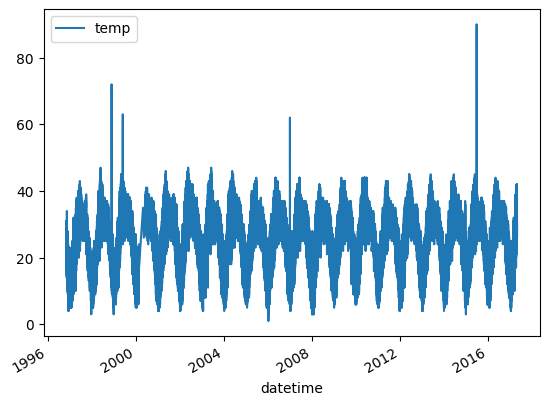

In [60]:
core_weather[["temp"]].plot()

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>], dtype=object)

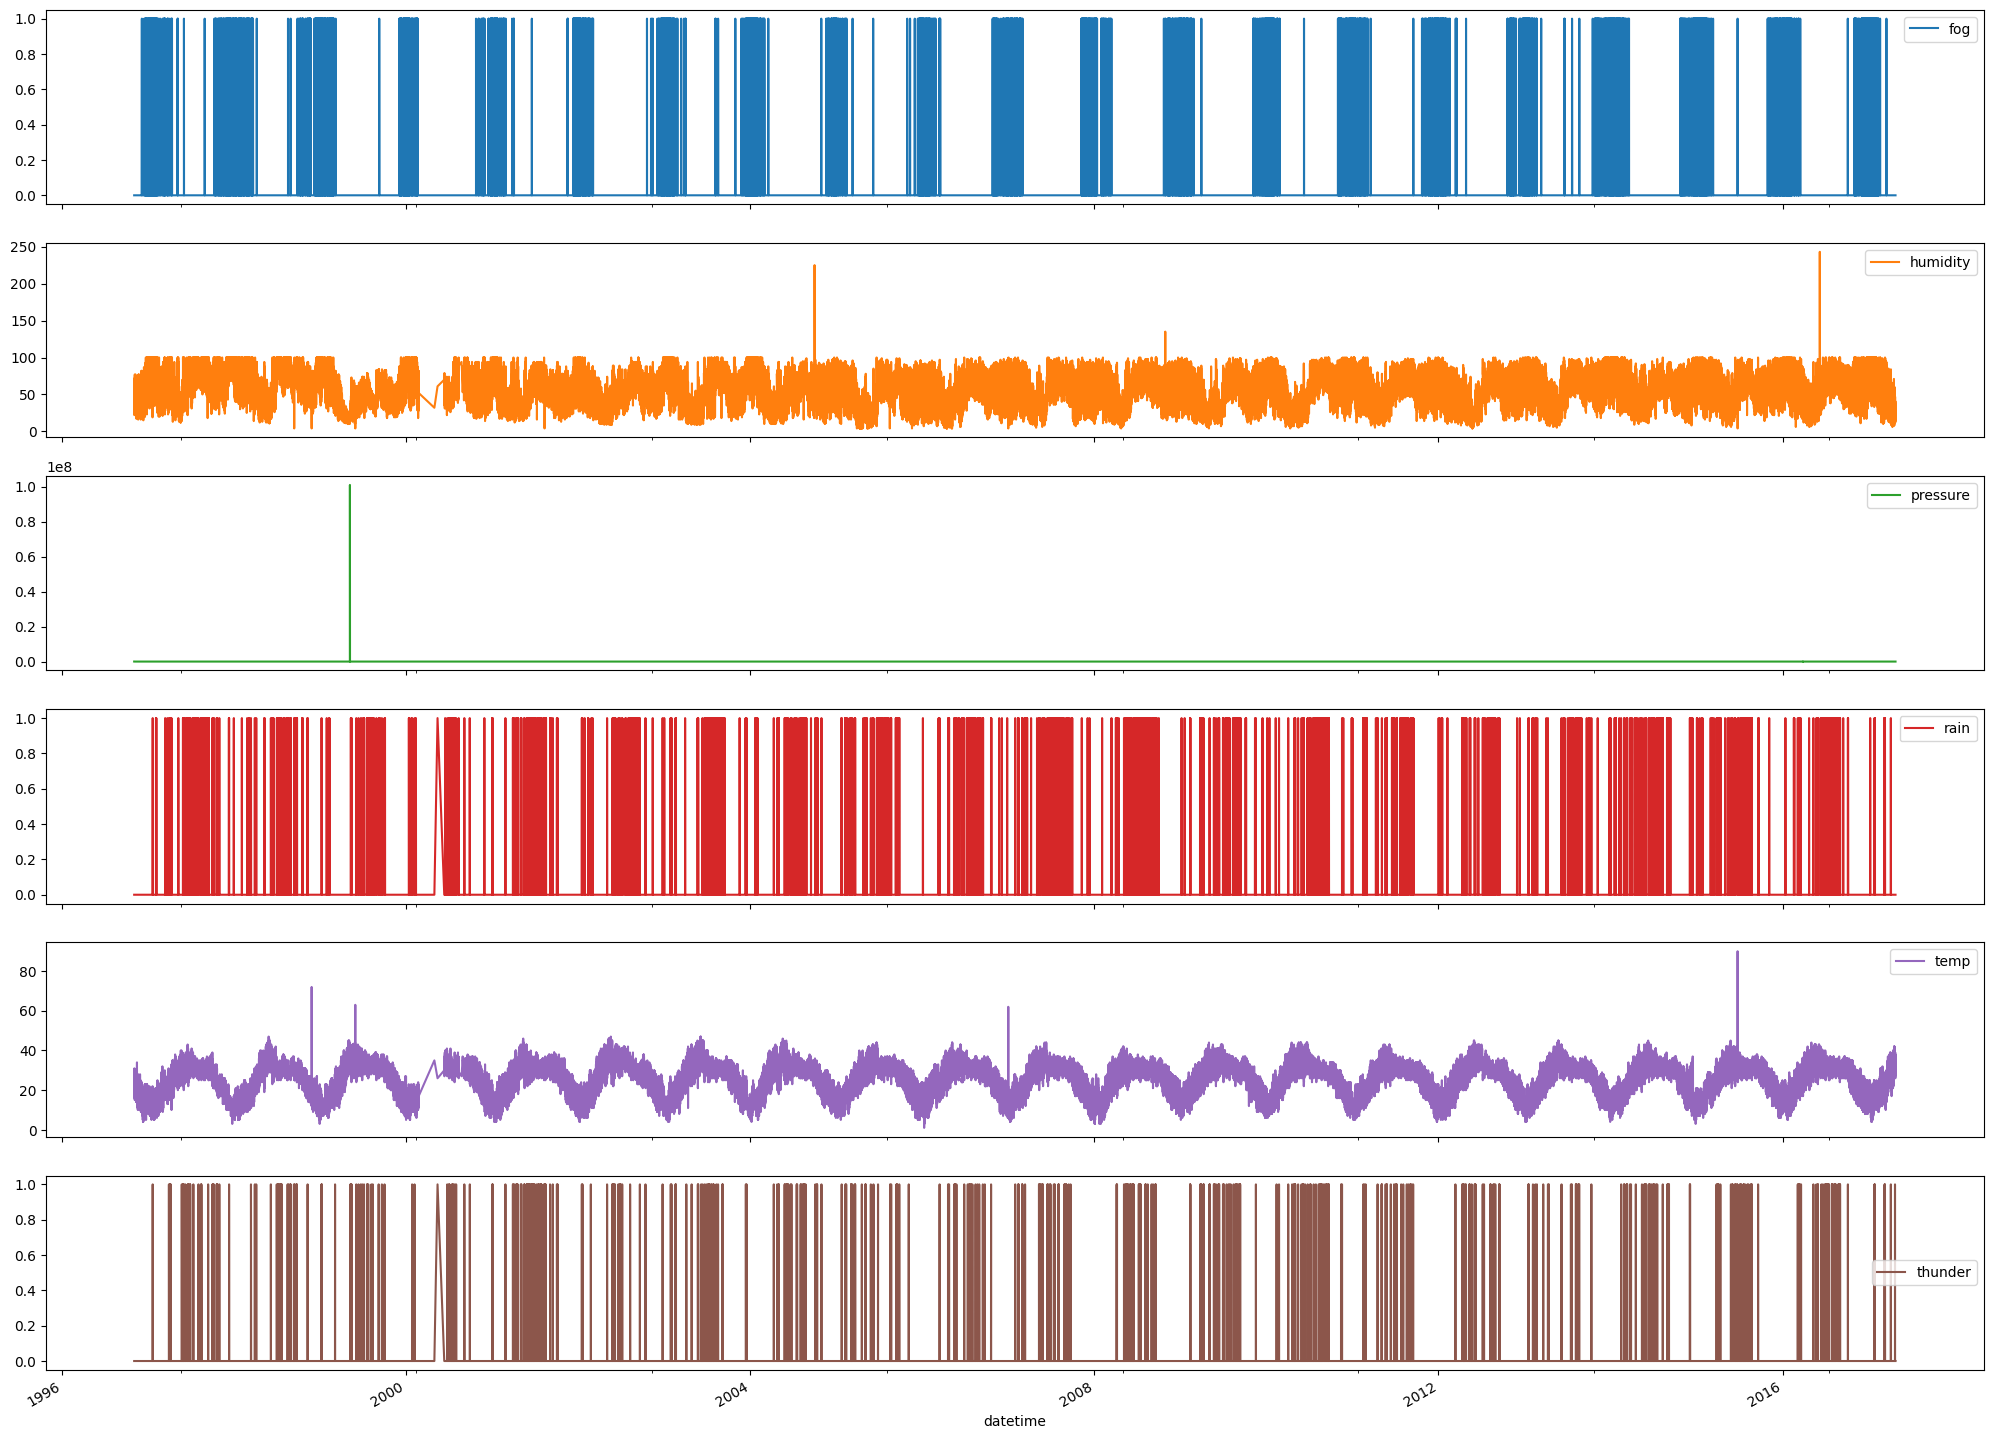

In [61]:
core_weather.plot(subplots=True, figsize=(25,20))

<Axes: xlabel='datetime'>

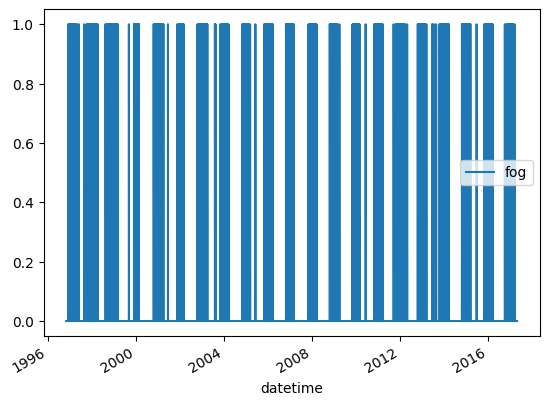

In [62]:
core_weather[["fog"]].plot()

<Axes: xlabel='datetime'>

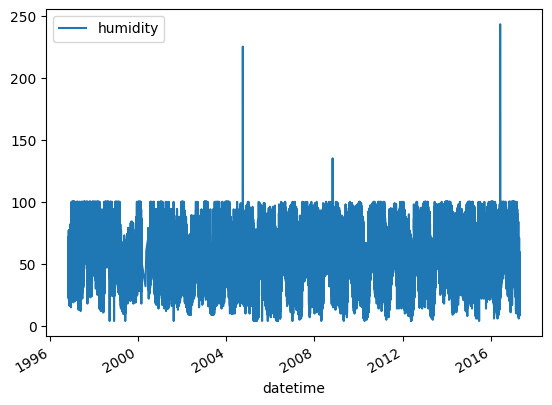

In [63]:
core_weather[["humidity"]].plot()

<Axes: xlabel='datetime'>

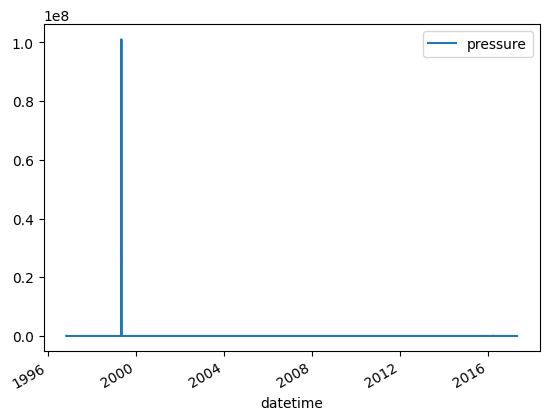

In [64]:
core_weather[["pressure"]].plot()

In [65]:
core_weather[["condition"]].plot()

TypeError: no numeric data to plot

In [67]:
core_weather.loc["20000101-01:00":"20000130-23:00",:]

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
2000-01-01 01:30:00,Fog,1,100.0,1017.0,0,8.0,0
2000-01-01 02:30:00,Fog,1,100.0,1018.0,0,9.0,0
2000-01-01 03:30:00,Fog,1,93.0,1019.0,0,9.0,0
2000-01-01 04:30:00,Fog,1,100.0,1020.0,0,10.0,0
2000-01-01 05:30:00,Fog,1,94.0,1019.0,0,12.0,0
...,...,...,...,...,...,...,...
2000-01-30 18:30:00,Haze,0,72.0,1015.0,0,14.0,0
2000-01-30 19:30:00,Haze,0,77.0,1015.0,0,14.0,0
2000-01-30 20:30:00,Smoke,0,82.0,1015.0,0,13.0,0


In [69]:
core_weather.loc["20040101-01:00":"20040130-23:00",:]

,condition,fog,humidity,pressure,rain,temp,thunder
datetime,,,,,,,
2004-01-01 01:00:00,Mist,0,87.0,1018.0,0,8.0,0
2004-01-01 01:30:00,Mist,0,93.0,1018.0,0,8.0,0
2004-01-01 02:00:00,Mist,0,93.0,1018.0,0,8.0,0
2004-01-01 02:30:00,Mist,0,93.0,11019.0,0,8.0,0
2004-01-01 03:00:00,Mist,0,87.0,1019.0,0,9.0,0
...,...,...,...,...,...,...,...
2004-01-30 21:00:00,Mostly Cloudy,0,94.0,1012.0,0,12.0,0
2004-01-30 21:30:00,Mostly Cloudy,0,100.0,1012.0,0,11.0,0
2004-01-30 22:00:00,Mostly Cloudy,0,100.0,1012.0,0,11.0,0


<Axes: xlabel='datetime'>

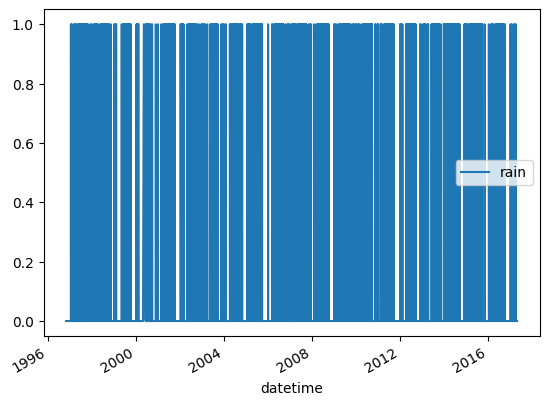

In [70]:
core_weather[["rain"]].plot()

array([[<Axes: title={'center': 'fog'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'thunder'}>]], dtype=object)

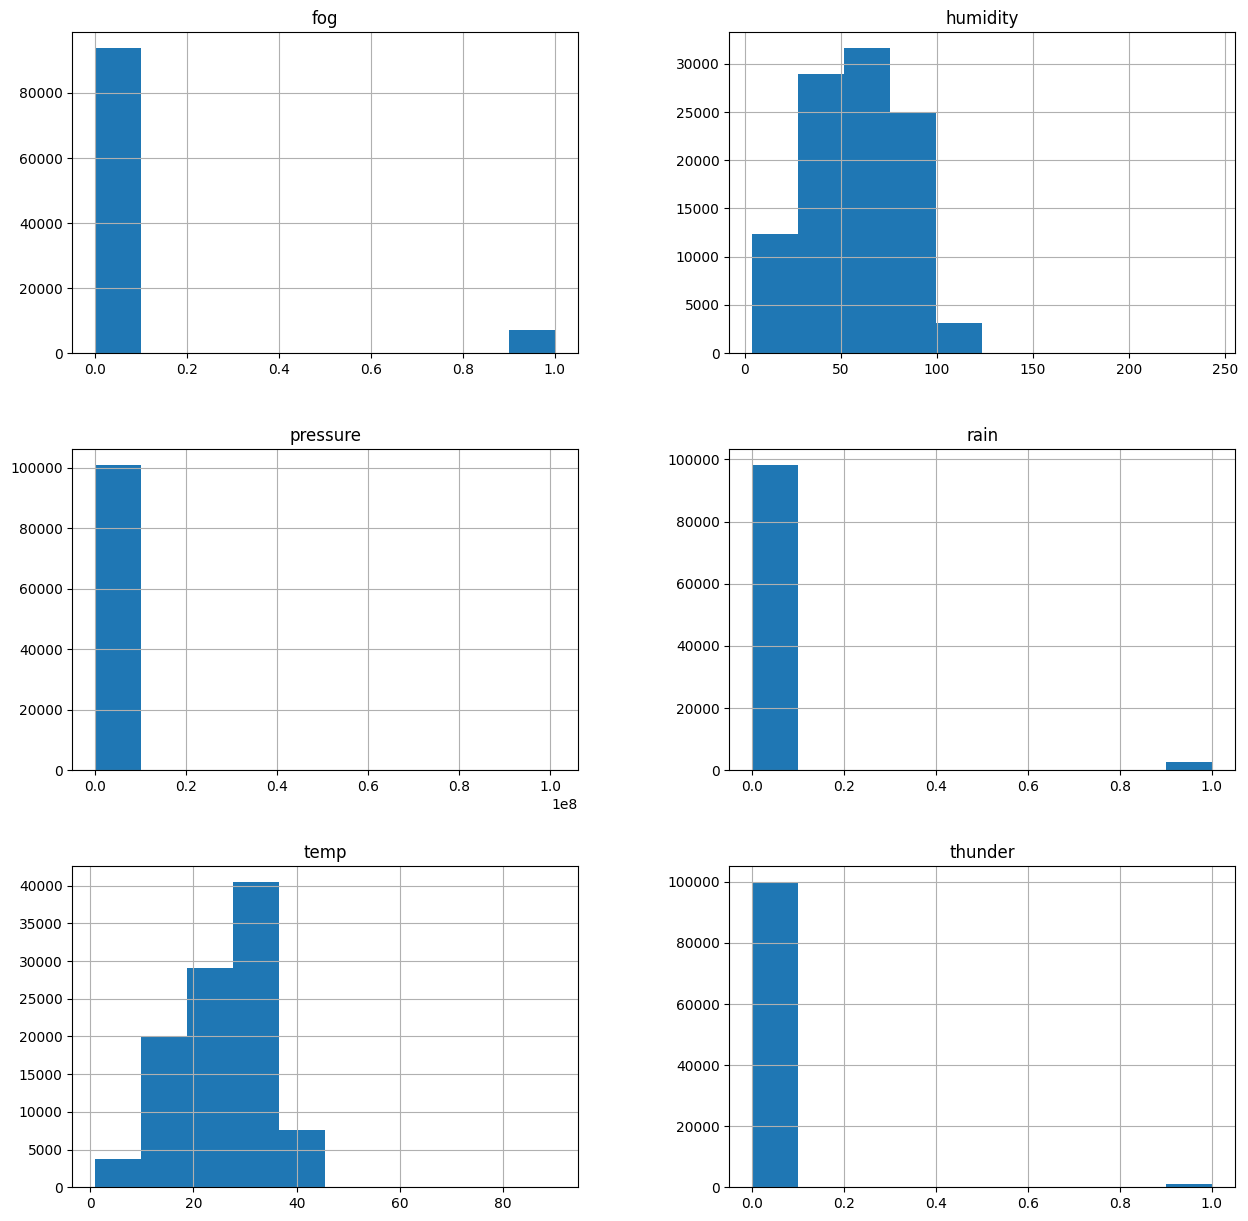

In [71]:
core_weather.hist(bins=10,figsize=(15,15))

In [72]:
core_weather["target"] = core_weather.shift(-1)["temp"]

In [73]:
core_weather

,condition,fog,humidity,pressure,rain,temp,thunder,target
datetime,,,,,,,,
1996-11-01 11:00:00,Smoke,0,27.0,1010.0,0,30.0,0,28.0
1996-11-01 12:00:00,Smoke,0,32.0,-9999.0,0,28.0,0,24.0
1996-11-01 13:00:00,Smoke,0,44.0,-9999.0,0,24.0,0,24.0
1996-11-01 14:00:00,Smoke,0,41.0,1010.0,0,24.0,0,23.0
1996-11-01 16:00:00,Smoke,0,47.0,1011.0,0,23.0,0,21.0
...,...,...,...,...,...,...,...,...
2017-04-24 06:00:00,Haze,0,25.0,1005.0,0,34.0,0,38.0
2017-04-24 09:00:00,Haze,0,16.0,1003.0,0,38.0,0,36.0
2017-04-24 12:00:00,Haze,0,14.0,1002.0,0,36.0,0,32.0
